In [1]:
%matplotlib inline
from tools import ScalarTool, VectorTool
from operators import OperatorKit
import numpy as np
import matplotlib.pyplot as plt
import importlib

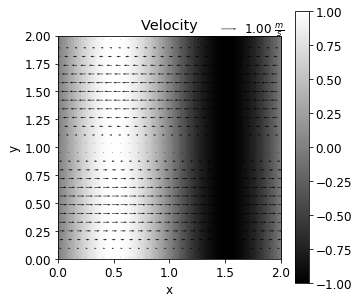

In [3]:
# Parameters
N=128
L = 2.0
dt = 0.0001
T = 0.1
kappa = 0.1

st = ScalarTool(N,L)
vt = VectorTool(N,L)
op = OperatorKit(N,L,kappa)

th = np.sin((2.0*np.pi/L)*st.X[0])

vector = op.u_sin_flow

fig= plt.figure(figsize = (5,5))
vt.plot(vector)
st.plot(th)
plt.title('Velocity')
plt.xlim(0,L)
plt.ylim(0,L)
plt.show()